In [1]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Set seaborn style for prettier plots
sns.set(style="whitegrid")

# This magic command ensures plots appear in the notebook
%matplotlib inline

print("Libraries Imported Successfully")

Libraries Imported Successfully


In [3]:
# Seaborn has the Iris dataset built-in
iris = sns.load_dataset('iris')

# --- 1. FIRST LOOK ---
print("--- First 5 Rows ---")
print(iris.head())

print("\n--- Statistical Summary ---")
print(iris.describe())

print("\n--- Data Info (Types, Non-Nulls) ---")
print(iris.info())

--- First 5 Rows ---
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

--- Statistical Summary ---
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

--- Data Info (Types, Non

In [4]:
# Check how many samples of each species we have
print("--- Class Distribution ---")
print(iris['species'].value_counts())

--- Class Distribution ---
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


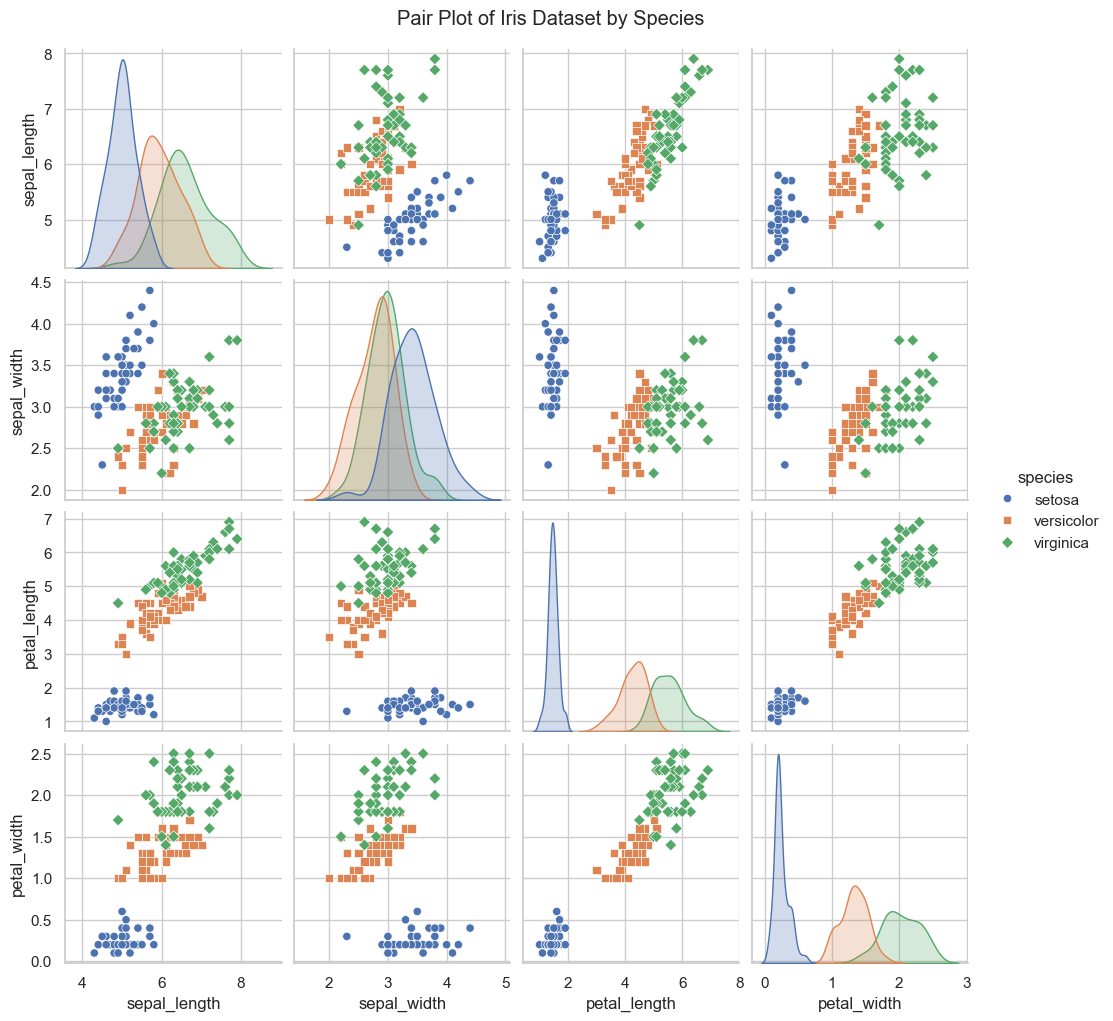

In [5]:
# The Pair Plot is the single best EDA visualization for a small dataset.
# It plots every feature against every other feature.
# 'hue="species"' colors the dots by their species.
sns.pairplot(iris, hue='species', markers=["o", "s", "D"])
plt.suptitle("Pair Plot of Iris Dataset by Species", y=1.02)
plt.show()

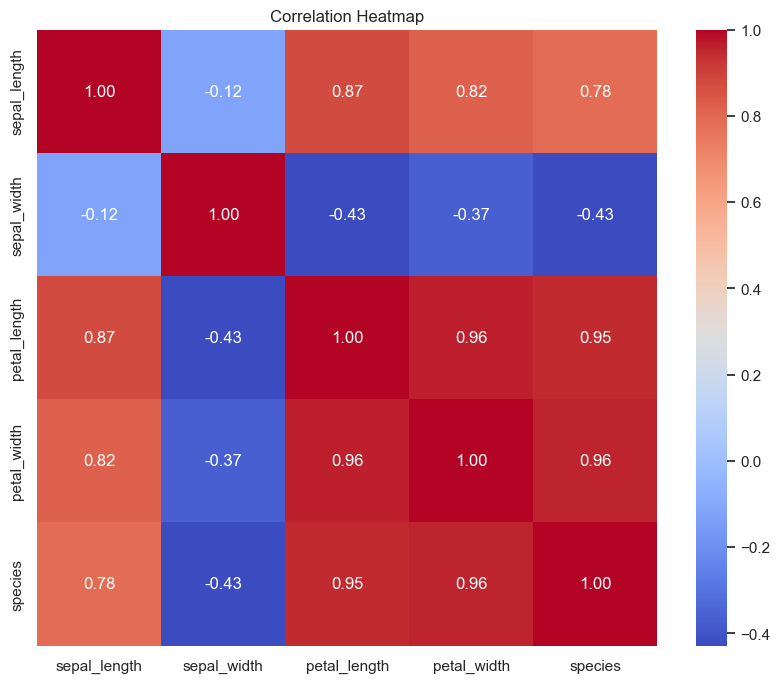

In [6]:
# Let's quantify the relationships
# We must convert species to a number to include it in the correlation
iris_corr = iris.copy()
iris_corr['species'] = iris_corr['species'].astype('category').cat.codes
corr = iris_corr.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [7]:
# 1. Define our features (X) and target (y)
X = iris.drop('species', axis=1)
y = iris['species']

# 2. Split data into training and testing sets
# We use 80% for training and 20% for testing.
# random_state=42 ensures we get the same "random" split every time.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: X={X_train.shape}, y={y_train.shape}")
print(f"Testing set shape: X={X_test.shape}, y={y_test.shape}")

Training set shape: X=(120, 4), y=(120,)
Testing set shape: X=(30, 4), y=(30,)


In [8]:
# --- Model 1: Logistic Regression ---
# (Despite the name, this is a classification algorithm)

print("--- Training Logistic Regression ---")
# 1. Initialize the model
log_reg = LogisticRegression(max_iter=200)

# 2. Train the model (find the best "lines" to separate the classes)
log_reg.fit(X_train, y_train)

# 3. Make predictions on the unseen test data
y_pred_log = log_reg.predict(X_test)

# 4. Evaluate the model
print("\n--- Logistic Regression Results ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log) * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log))

--- Training Logistic Regression ---

--- Logistic Regression Results ---
Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [9]:
# --- Model 2: K-Nearest Neighbors (KNN) ---
# (A simple, intuitive model: "Tell me what your 5 closest neighbors are")

print("--- Training K-Nearest Neighbors (K=5) ---")
# 1. Initialize the model (let's check 5 neighbors)
knn = KNeighborsClassifier(n_neighbors=5)

# 2. Train the model (this just means "memorize the data")
knn.fit(X_train, y_train)

# 3. Make predictions
y_pred_knn = knn.predict(X_test)

# 4. Evaluate the model
print("\n--- KNN Results ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn) * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

--- Training K-Nearest Neighbors (K=5) ---

--- KNN Results ---
Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



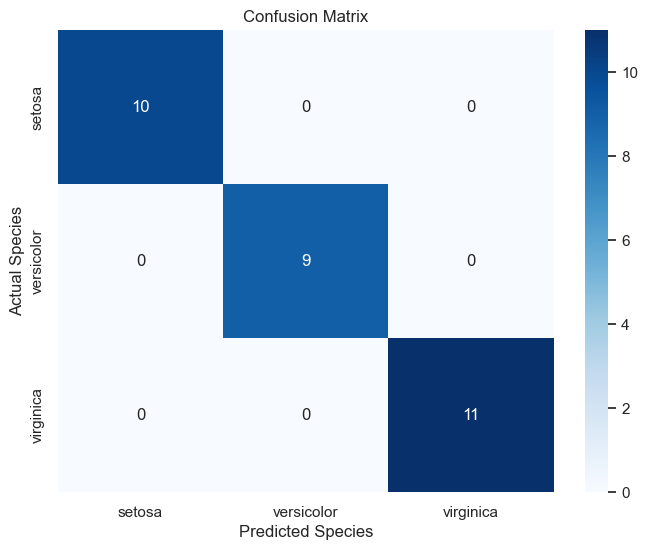

In [10]:
# Let's visualize *where* the model (if it did) got confused.
# We'll use the Logistic Regression model's predictions.
cm = confusion_matrix(y_test, y_pred_log)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=iris['species'].unique(), 
            yticklabels=iris['species'].unique())
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.title("Confusion Matrix")
plt.show()